## Analysis for paper

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

In [109]:
euk_all =  pd.read_csv('Euk_all_results.csv')
euk_rna = pd.read_csv('../results/Euk_RNA_results.csv')
euk_balt = pd.read_csv ('../results/Euk_balt_results.csv')
dfs = [euk_balt,euk_rna]
df = pd.concat(dfs)
df.head(20)


,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC
0,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,1,0.650
1,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,2,0.802
2,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,3,0.978
3,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,4,0.999
4,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,5,1.000
5,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,6,1.000
6,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,7,1.000
7,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,8,1.000
8,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,DNA,9,1.000
9,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,250,AA,1,0.986


In [110]:
def clean_df(df):
    df.rename(columns = {'label tax group':'tax','positive label':'label'}, inplace=True)
    df.drop(columns= [ 'pool label','pool tax group'], inplace=True)
    con = lambda row :f'{row["label"]}_{row["tax"]}_{row["Baltimore"]}' 
    df['Dataset'] = df.apply ( con, axis =1)
    fs = lambda row: f'{row["Features"]}_{row["k"]}'
    df['Feature set'] = df.apply(fs,axis = 1)


    balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']
    tax_order =['kingdom','phylum','class','order','family','genus','species']
    fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domains_0']
    df['tax'] = df['tax'].astype('category')
    df['tax'].cat.set_categories(tax_order, inplace=True)
    df['Feature set'] = df['Feature set'].astype('category')
    df['Feature set'].cat.set_categories(fs_order, inplace=True)
    df['Baltimore'] = df['Baltimore'].astype('category')
    df['Baltimore'].cat.set_categories(balt_order, inplace=True)
    return df

In [111]:
dfe = clean_df(df)
dfe.head(21)

,label,tax,Baltimore,N in class,Features,k,AUC,Dataset,Feature set
0,Metazoa,kingdom,dsDNA,250,DNA,1,0.650,Metazoa_kingdom_dsDNA,DNA_1
1,Metazoa,kingdom,dsDNA,250,DNA,2,0.802,Metazoa_kingdom_dsDNA,DNA_2
2,Metazoa,kingdom,dsDNA,250,DNA,3,0.978,Metazoa_kingdom_dsDNA,DNA_3
3,Metazoa,kingdom,dsDNA,250,DNA,4,0.999,Metazoa_kingdom_dsDNA,DNA_4
4,Metazoa,kingdom,dsDNA,250,DNA,5,1.000,Metazoa_kingdom_dsDNA,DNA_5
5,Metazoa,kingdom,dsDNA,250,DNA,6,1.000,Metazoa_kingdom_dsDNA,DNA_6
6,Metazoa,kingdom,dsDNA,250,DNA,7,1.000,Metazoa_kingdom_dsDNA,DNA_7
7,Metazoa,kingdom,dsDNA,250,DNA,8,1.000,Metazoa_kingdom_dsDNA,DNA_8
8,Metazoa,kingdom,dsDNA,250,DNA,9,1.000,Metazoa_kingdom_dsDNA,DNA_9
9,Metazoa,kingdom,dsDNA,250,AA,1,0.986,Metazoa_kingdom_dsDNA,AA_1


In [102]:
resultsfile = '../results/Bacteria_DNA_results.csv'
df = pd.read_csv(resultsfile)
correct_b = lambda row:'dsDNA' if row['Baltimore']== 'DNA' else row['Baltimore']
df['Baltimore']= df.apply(correct_b , axis=1)
dfB = clean_df(df)
df.head(25)


,label,tax,Baltimore,N in class,Features,k,AUC,Dataset,Feature set
0,Alteromonadales,order,dsDNA,30,DNA,1,0.516,Alteromonadales_order_dsDNA,DNA_1
1,Alteromonadales,order,dsDNA,30,DNA,2,0.922,Alteromonadales_order_dsDNA,DNA_2
2,Alteromonadales,order,dsDNA,30,DNA,3,1.000,Alteromonadales_order_dsDNA,DNA_3
3,Alteromonadales,order,dsDNA,30,DNA,4,1.000,Alteromonadales_order_dsDNA,DNA_4
4,Alteromonadales,order,dsDNA,30,DNA,5,0.984,Alteromonadales_order_dsDNA,DNA_5
5,Alteromonadales,order,dsDNA,30,DNA,6,0.984,Alteromonadales_order_dsDNA,DNA_6
6,Alteromonadales,order,dsDNA,30,DNA,7,0.984,Alteromonadales_order_dsDNA,DNA_7
7,Alteromonadales,order,dsDNA,30,DNA,8,1.000,Alteromonadales_order_dsDNA,DNA_8
8,Alteromonadales,order,dsDNA,30,DNA,9,1.000,Alteromonadales_order_dsDNA,DNA_9
9,Alteromonadales,order,dsDNA,30,AA,1,0.833,Alteromonadales_order_dsDNA,AA_1


In [42]:
dfe.head()

,label,tax,Baltimore,N in class,Features,k,AUC,Dataset,Feature set
0,Metazoa,kingdom,dsDNA,250,DNA,1,0.650,Metazoa_kingdom_dsDNA,DNA_1
1,Metazoa,kingdom,dsDNA,250,DNA,2,0.802,Metazoa_kingdom_dsDNA,DNA_2
2,Metazoa,kingdom,dsDNA,250,DNA,3,0.978,Metazoa_kingdom_dsDNA,DNA_3
3,Metazoa,kingdom,dsDNA,250,DNA,4,0.999,Metazoa_kingdom_dsDNA,DNA_4
4,Metazoa,kingdom,dsDNA,250,DNA,5,1.000,Metazoa_kingdom_dsDNA,DNA_5


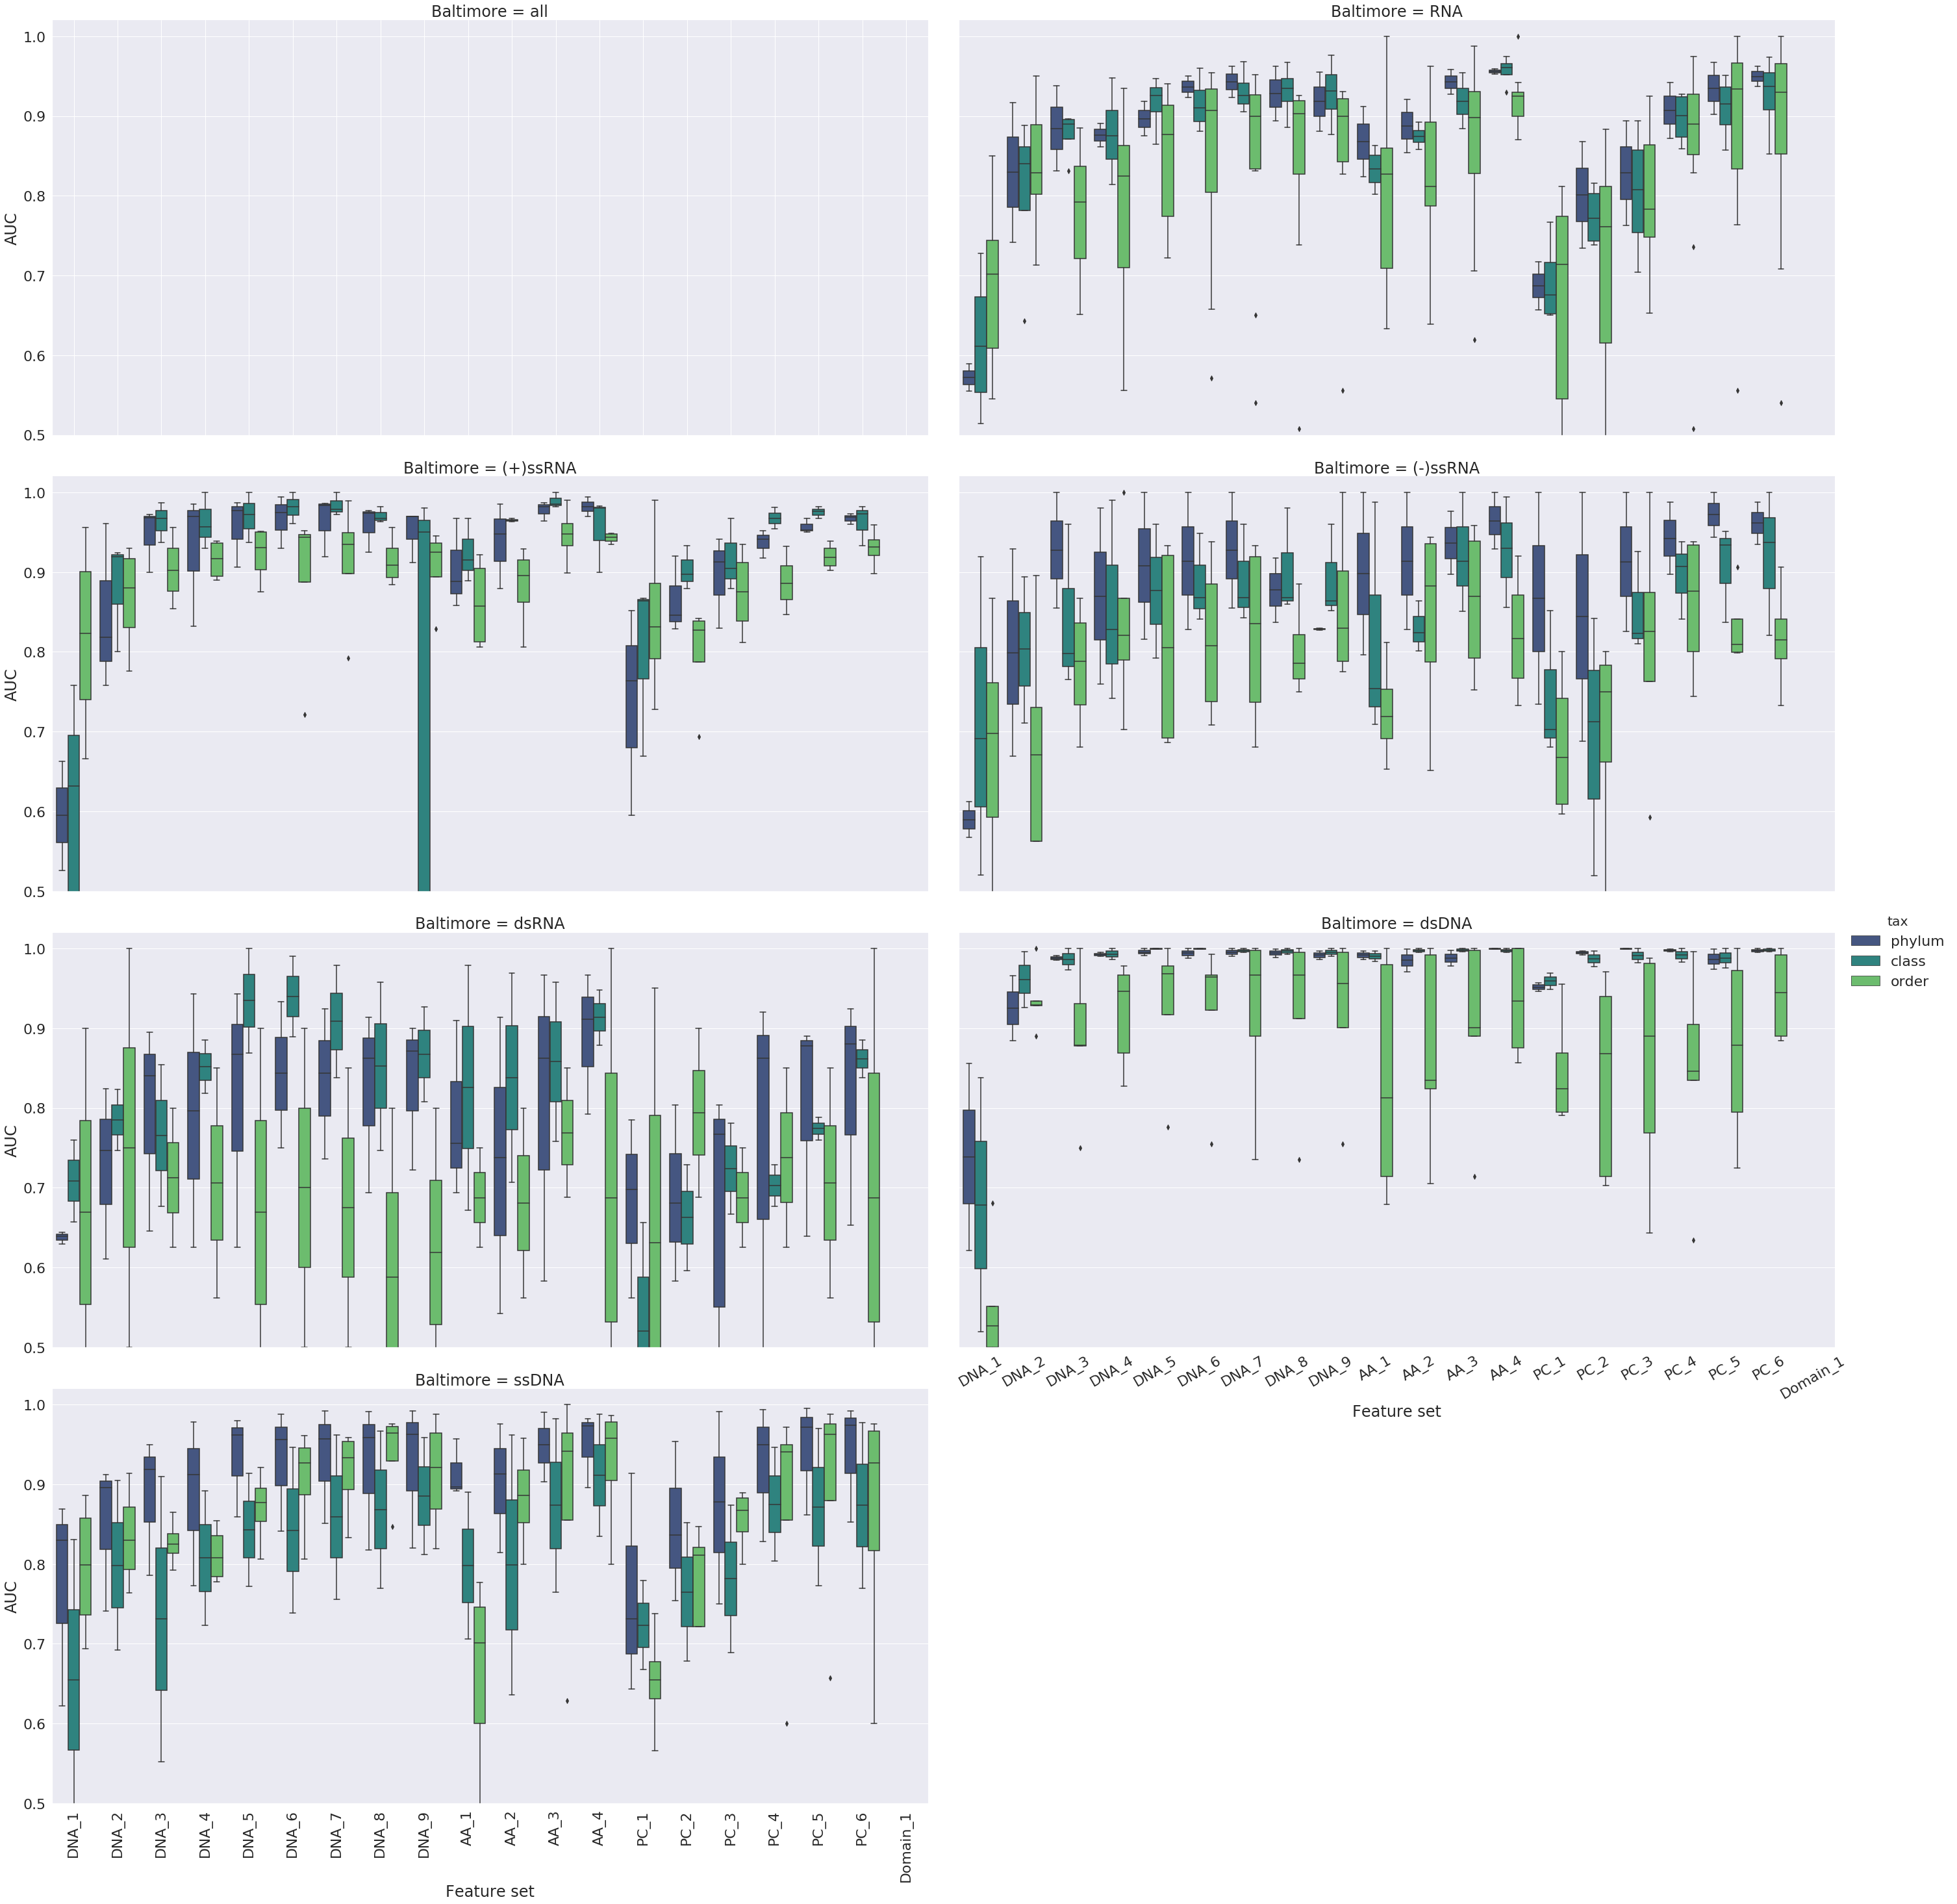

In [54]:
sns.set(font_scale=2, palette = 'viridis' )
g = sns.catplot(data=dfe  ,col = 'Baltimore',col_wrap=2, height=10,aspect =2, 
                  margin_titles=True,  legend_out = True,col_order=balt_order,
                    x = 'Feature set',y = 'AUC', hue = 'tax',
                    kind = 'box',
                    hue_order = tax_order,
                    palette='viridis',
                    order= fs_order,
                    #dodge = True,
                    #sharex = False
                       )
g.set_xticklabels(rotation=30)        
plt.xticks(rotation='vertical')
g.set(ylim = (0.5,1.02) ) 
plt.subplots_adjust(hspace = 0.1)

#g.savefig('Figures/point_tax_Numbers_RNA.png', bbox_inches="tight", dpi=500)

## Boxplots for Eukaryote data - showing seperate baltimore classes

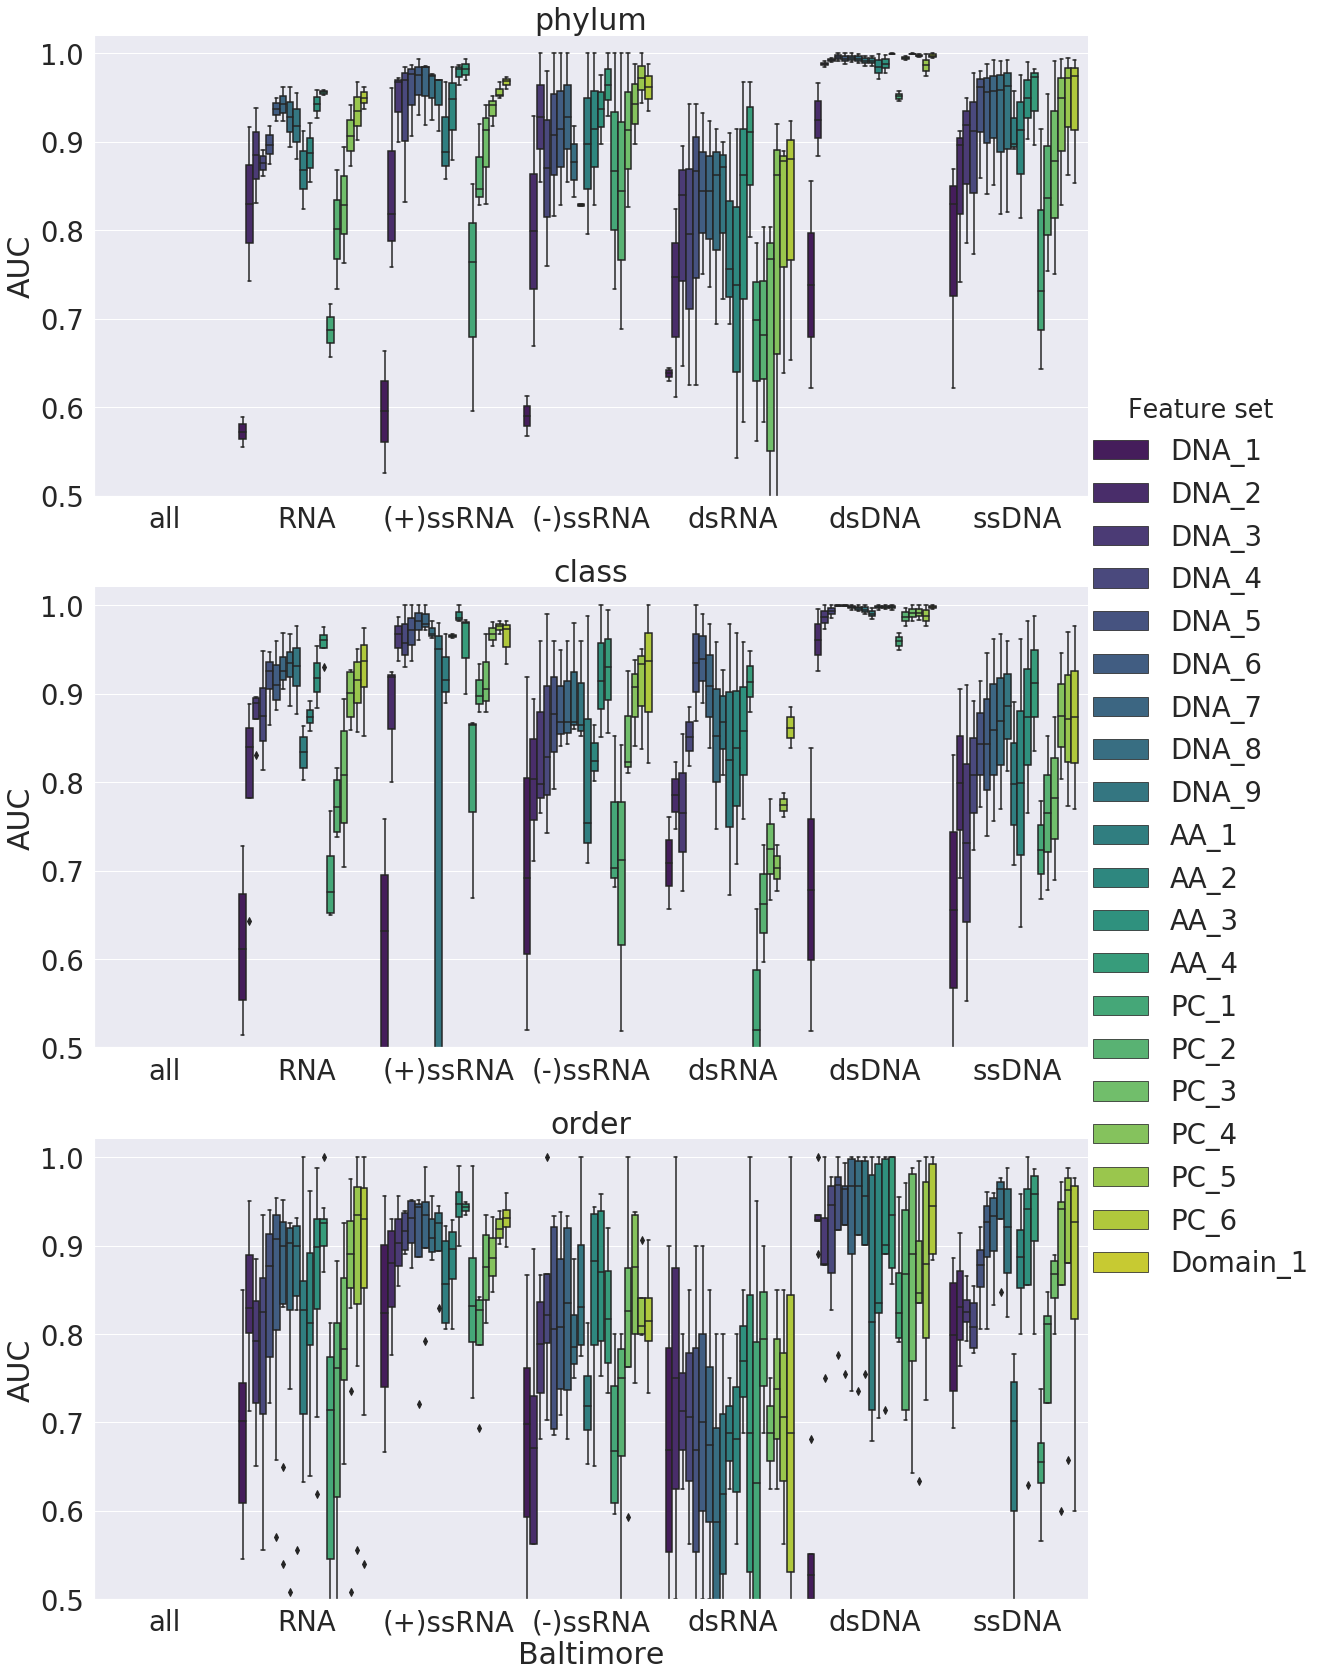

In [55]:
tax_order = ['phylum','class','order']
subset = dfe[dfe['tax'].isin(tax_order)]

sns.set(font_scale=2.5 )
g = sns.catplot(data=subset , col= "tax",col_wrap=1, height=8,aspect =2, 
                  margin_titles=True, col_order=tax_order, legend_out = True,
                    x = 'Baltimore',y = 'AUC', hue = 'Feature set',
                    kind = 'box',
                    hue_order = fs_order,
                    palette='viridis',
                    order= balt_order,
                    dodge = True,
                    sharex = False,
                     width =.95 ,linewidth =1.5)
                  
g.set_titles('{col_name}' ,fontsize= 80)
g.set(ylim = (0.5,1.02) ) 
plt.subplots_adjust(hspace = 0.2)

#g.savefig('Figures/Euk_box_tax_Balt_RNA.PNG', bbox_inches="tight", dpi=300)

In [53]:
g.savefig('../figures/Euk_box_tax_Balt_RNA.png', bbox_inches="tight", dpi=300)

In [112]:
#fs_order =['DNA_2','DNA_6','DNA_9','AA_1','AA_3', 'AA_4','PC_1','PC_6','Domain_1']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
tax_order =  ['phylum','class','order','family','genus','species']
                    
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']

### Plots of dataset size against AUC score for all datasets

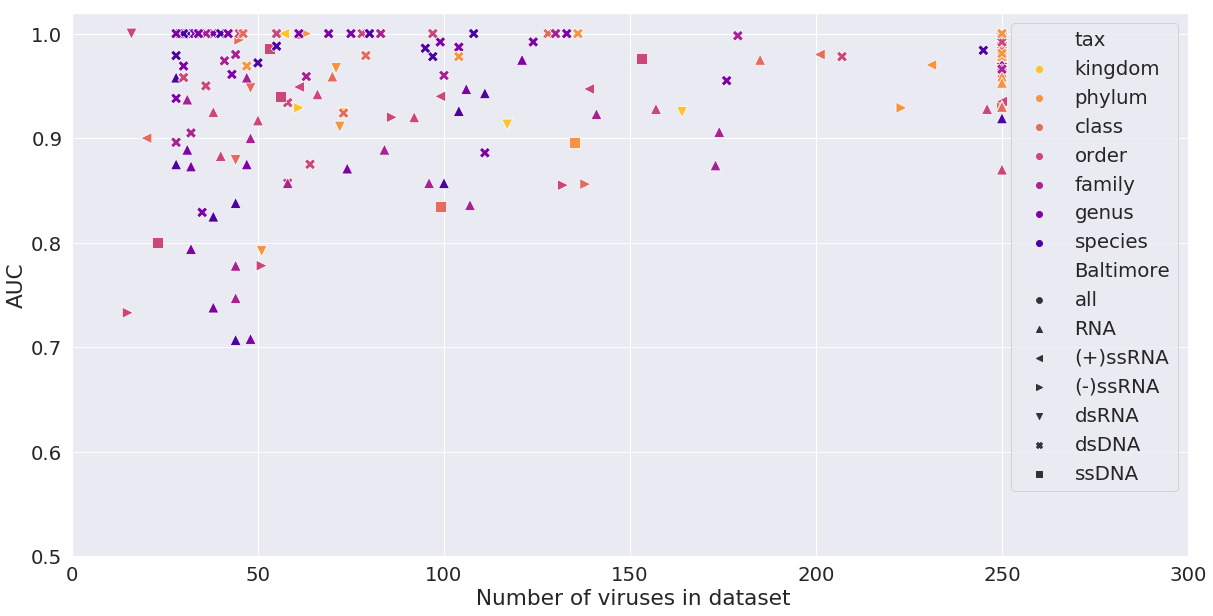

In [62]:
results = pd.concat([dfe,dfB])

domains =  results[(results['Feature set'].isin(['AA_4'])) ]
dom =  domains[~(domains['Baltimore'].isin(['Retro'])) ]
f, ax = plt.subplots(figsize=(20, 10))
marks = ('8','^', '<',  '>','v','X' ,'s')
sns.color_palette("plasma")
g = sns.scatterplot(x="N in class", y="AUC",hue ='tax',markers =marks,palette ='plasma_r',style = 'Baltimore', s=120,  data=dom)
g.set(xlim = (0,300) ) 
g.set (ylim = (0.5,1.02))
fig = g.get_figure()
plt.legend()
plt.xlabel (' Number of viruses in dataset')
fig.savefig('../figures/N_AUC_tax.png', bbox_inches="tight", dpi=300)

In [67]:
euk_rna = clean_df(euk_rna)
euk_rna.info()

#ss = df[(df['tax'].isin(['phylum','genus']))]
euk_rna.groupby(['tax','Feature set']).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
label          1020 non-null object
tax            1020 non-null category
Baltimore      1020 non-null category
N in class     1020 non-null int64
Features       1020 non-null object
k              1020 non-null int64
AUC            1020 non-null float64
Dataset        1020 non-null object
Feature set    969 non-null category
dtypes: category(3), float64(1), int64(2), object(3)
memory usage: 52.4+ KB


N in class                                                \
                         count   mean        std    min    25%    50%    75%   
tax     Feature set                                                            
phylum  DNA_1              2.0  250.0   0.000000  250.0  250.0  250.0  250.0   
        DNA_2              2.0  250.0   0.000000  250.0  250.0  250.0  250.0   
        DNA_3              2.0  250.0   0.000000  250.0  250.0  250.0  250.0   
        DNA_4              2.0  250.0   0.000000  250.0  250.0  250.0  250.0   
        DNA_5              2.0  250.0   0.000000  250.0  250.0  250.0  250.0   
...                        ...    ...        ...    ...    ...    ...    ...   
species PC_2               9.0   83.0  71.168813   28.0   38.0   44.0  104.0   
        PC_3               9.0   83.0  71.168813   28.0   38.0   44.0  104.0   
        PC_4               9.0   83.0  71.168813   28.0   38.0   44.0  104.0   
        PC_5               9.0   83.0  71.168813   28.0   38.0   44.0  104.0   
        PC_6               9.0   83.0  71.168813   28.0   38.0   44.0  104.0   

                               k       ...             AUC            \
                       max count mean  ...  75%  max count      mean   
tax     Feature set                    ...                             
phylum  DNA_1        250.0   2.0  1.0  ...  1.0  1.0   2.0  0.572000   
        DNA_2        250.0   2.0  2.0  ...  2.0  2.0   2.0  0.829500   
        DNA_3        250.0   2.0  3.0  ...  3.0  3.0   2.0  0.884500   
        DNA_4        250.0   2.0  4.0  ...  4.0  4.0   2.0  0.876000   
        DNA_5        250.0   2.0  5.0  ...  5.0  5.0   2.0  0.896500   
...                    ...   ...  ...  ...  ...  ...   ...       ...   
species PC_2         250.0   9.0  2.0  ...  2.0  2.0   9.0  0.746778   
        PC_3         250.0   9.0  3.0  ...  3.0  3.0   9.0  0.807000   
        PC_4         250.0   9.0  4.0  ...  4.0  4.0   9.0  0.833889   
        PC_5         250.0   9.0  5.0  ...  5.0  5.0   9.0  0.844778   
        PC_6         250.0   9.0  6.0  ...  6.0  6.0   9.0  0.861778   

                                                                       
                          std    min      25%     50%      75%    max  
tax     Feature set                                                    
phylum  DNA_1        0.024042  0.555  0.56350  0.5720  0.58050  0.589  
        DNA_2        0.123744  0.742  0.78575  0.8295  0.87325  0.917  
        DNA_3        0.075660  0.831  0.85775  0.8845  0.91125  0.938  
        DNA_4        0.021213  0.861  0.86850  0.8760  0.88350  0.891  
        DNA_5        0.030406  0.875  0.88575  0.8965  0.90725  0.918  
...                       ...    ...      ...     ...      ...    ...  
species PC_2         0.089873  0.606  0.70000  0.7450  0.77100  0.900  
        PC_3         0.082228  0.700  0.73700  0.7940  0.88200  0.917  
        PC_4         0.086176  0.697  0.78800  0.8540  0.89300  0.938  
        PC_5         0.088041  0.667  0.81800  0.8330  0.90300  0.958  
        PC_6         0.078057  0.707  0.81800  0.8720  0.91000  0.979  

[114 rows x 24 columns]

sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
...                   hue_order=["Dinner", "Lunch"],
...                   hue_kws=dict(marker=["^", "v"]))
>>> g = (g.map(plt.scatter, "total_bill", "tip", **kws)
...      .add_legend())

In [88]:
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
tax_order =  ['phylum','class','order','family','genus','species']
f_order = ['DNA','AA','PC','Domain']                   
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']

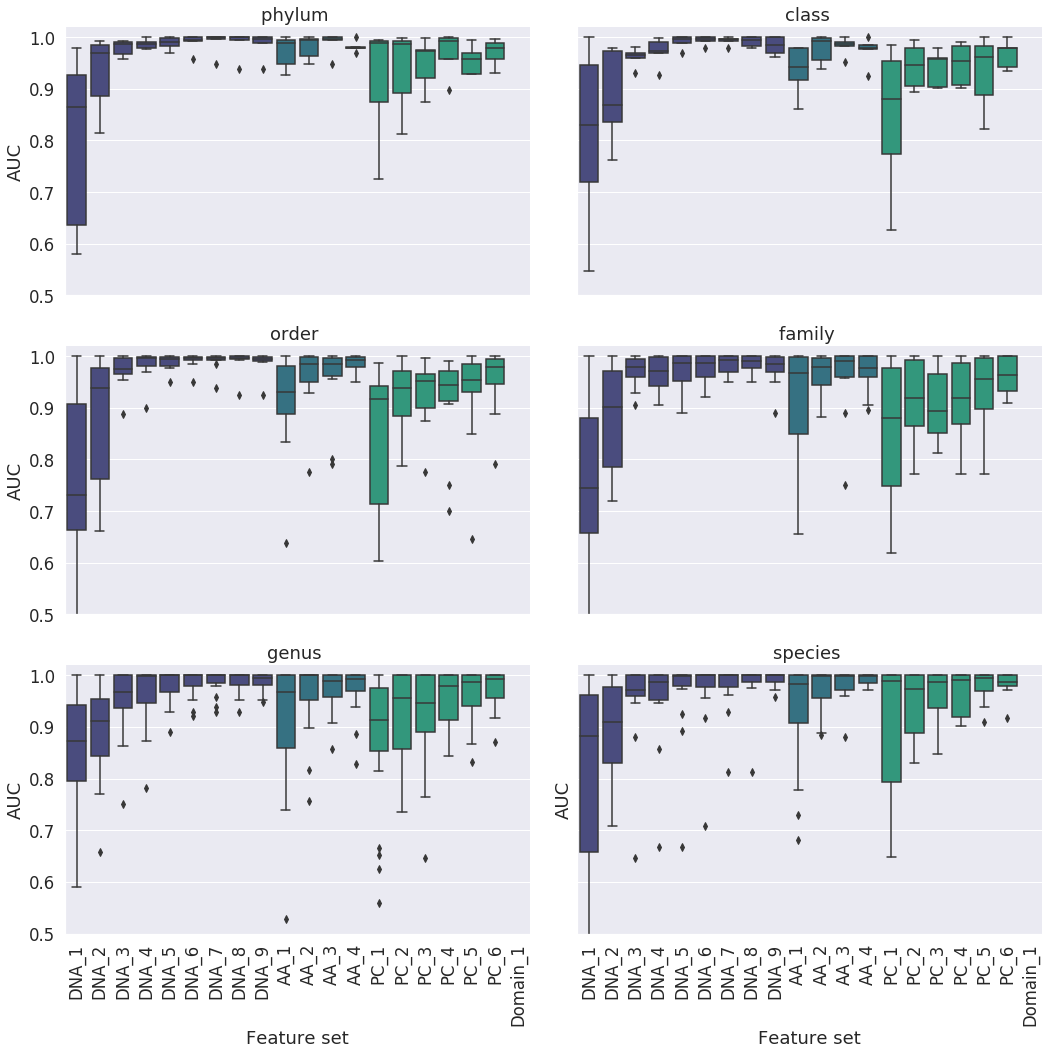

In [89]:

sns.set(font_scale=1.5, palette = 'viridis' )
g = sns.catplot(data=dfB , col= "tax",col_wrap=2, height=5,aspect =1.5, 
                  margin_titles=True, col_order=tax_order, legend = False,
                    x = 'Feature set',y = 'AUC', hue = 'Features',
                    kind = 'box',
                    hue_order = f_order,
                    palette='viridis',
                    order= fs_order,
                    dodge = False,
                    sharex = True,
                     )
                  
g.set_xticklabels(rotation=90)
g.set(ylim = (0.5,1.02) ) 
g.set_titles(("{col_name} "),fontsize= 200)
plt.subplots_adjust(hspace = 0.2)
plt.xlabel("Feature set")
plt.ylabel("AUC")
plt.tight_layout()
#g.savefig('Figures/box_tax_BAct.png', bbox_inches="tight", dpi=300)

In [79]:
concat_ds = lambda row: f'{row["tax"][0]}_{row["Dataset"]} '
dfe['Dataset']= dfe.apply(concat_ds , axis=1)

In [116]:
df1 = dfe.sort_values('tax')
unique =[]
[unique.append(ds) for ds in(list(df1['Dataset']))if ds not in unique ]
unique

['Metazoa_kingdom_dsDNA',
 'Viridiplantae_kingdom_dsRNA',
 'Viridiplantae_kingdom_(+)ssRNA',
 'Viridiplantae_kingdom_ssDNA',
 'Viridiplantae_kingdom_(-)ssRNA',
 'Fungi_kingdom_dsRNA',
 'Fungi_kingdom_(+)ssRNA',
 'Metazoa_kingdom_Retro',
 'Metazoa_kingdom_ssDNA',
 'Metazoa_kingdom_dsRNA',
 'Metazoa_kingdom_(+)ssRNA',
 'Metazoa_kingdom_(-)ssRNA',
 'Streptophyta_phylum_ssDNA',
 'Streptophyta_phylum_dsRNA',
 'Arthropoda_phylum_dsRNA',
 'Arthropoda_phylum_(+)ssRNA',
 'Chordata_phylum_RNA',
 'Streptophyta_phylum_(+)ssRNA',
 'Arthropoda_phylum_RNA',
 'Streptophyta_phylum_(-)ssRNA',
 'Arthropoda_phylum_ssDNA',
 'Chordata_phylum_dsRNA',
 'Chordata_phylum_ssDNA',
 'Chordata_phylum_(+)ssRNA',
 'Chordata_phylum_dsDNA',
 'Chordata_phylum_(-)ssRNA',
 'Arthropoda_phylum_dsDNA',
 'Chordata_phylum_Retro',
 'Arachnida_class_RNA',
 'Insecta_class_RNA',
 'Insecta_class_(+)ssRNA',
 'Insecta_class_(-)ssRNA',
 'Arachnida_class_(-)ssRNA',
 'Arachnida_class_(+)ssRNA',
 'Mammalia_class_RNA',
 'Aves_class_RNA',


In [93]:
ds = (df['Dataset')

119

In [113]:
dfp = dfe.pivot_table(index='Dataset',columns='Feature set', values ='AUC')
df2 = dfp.reindex(unique)

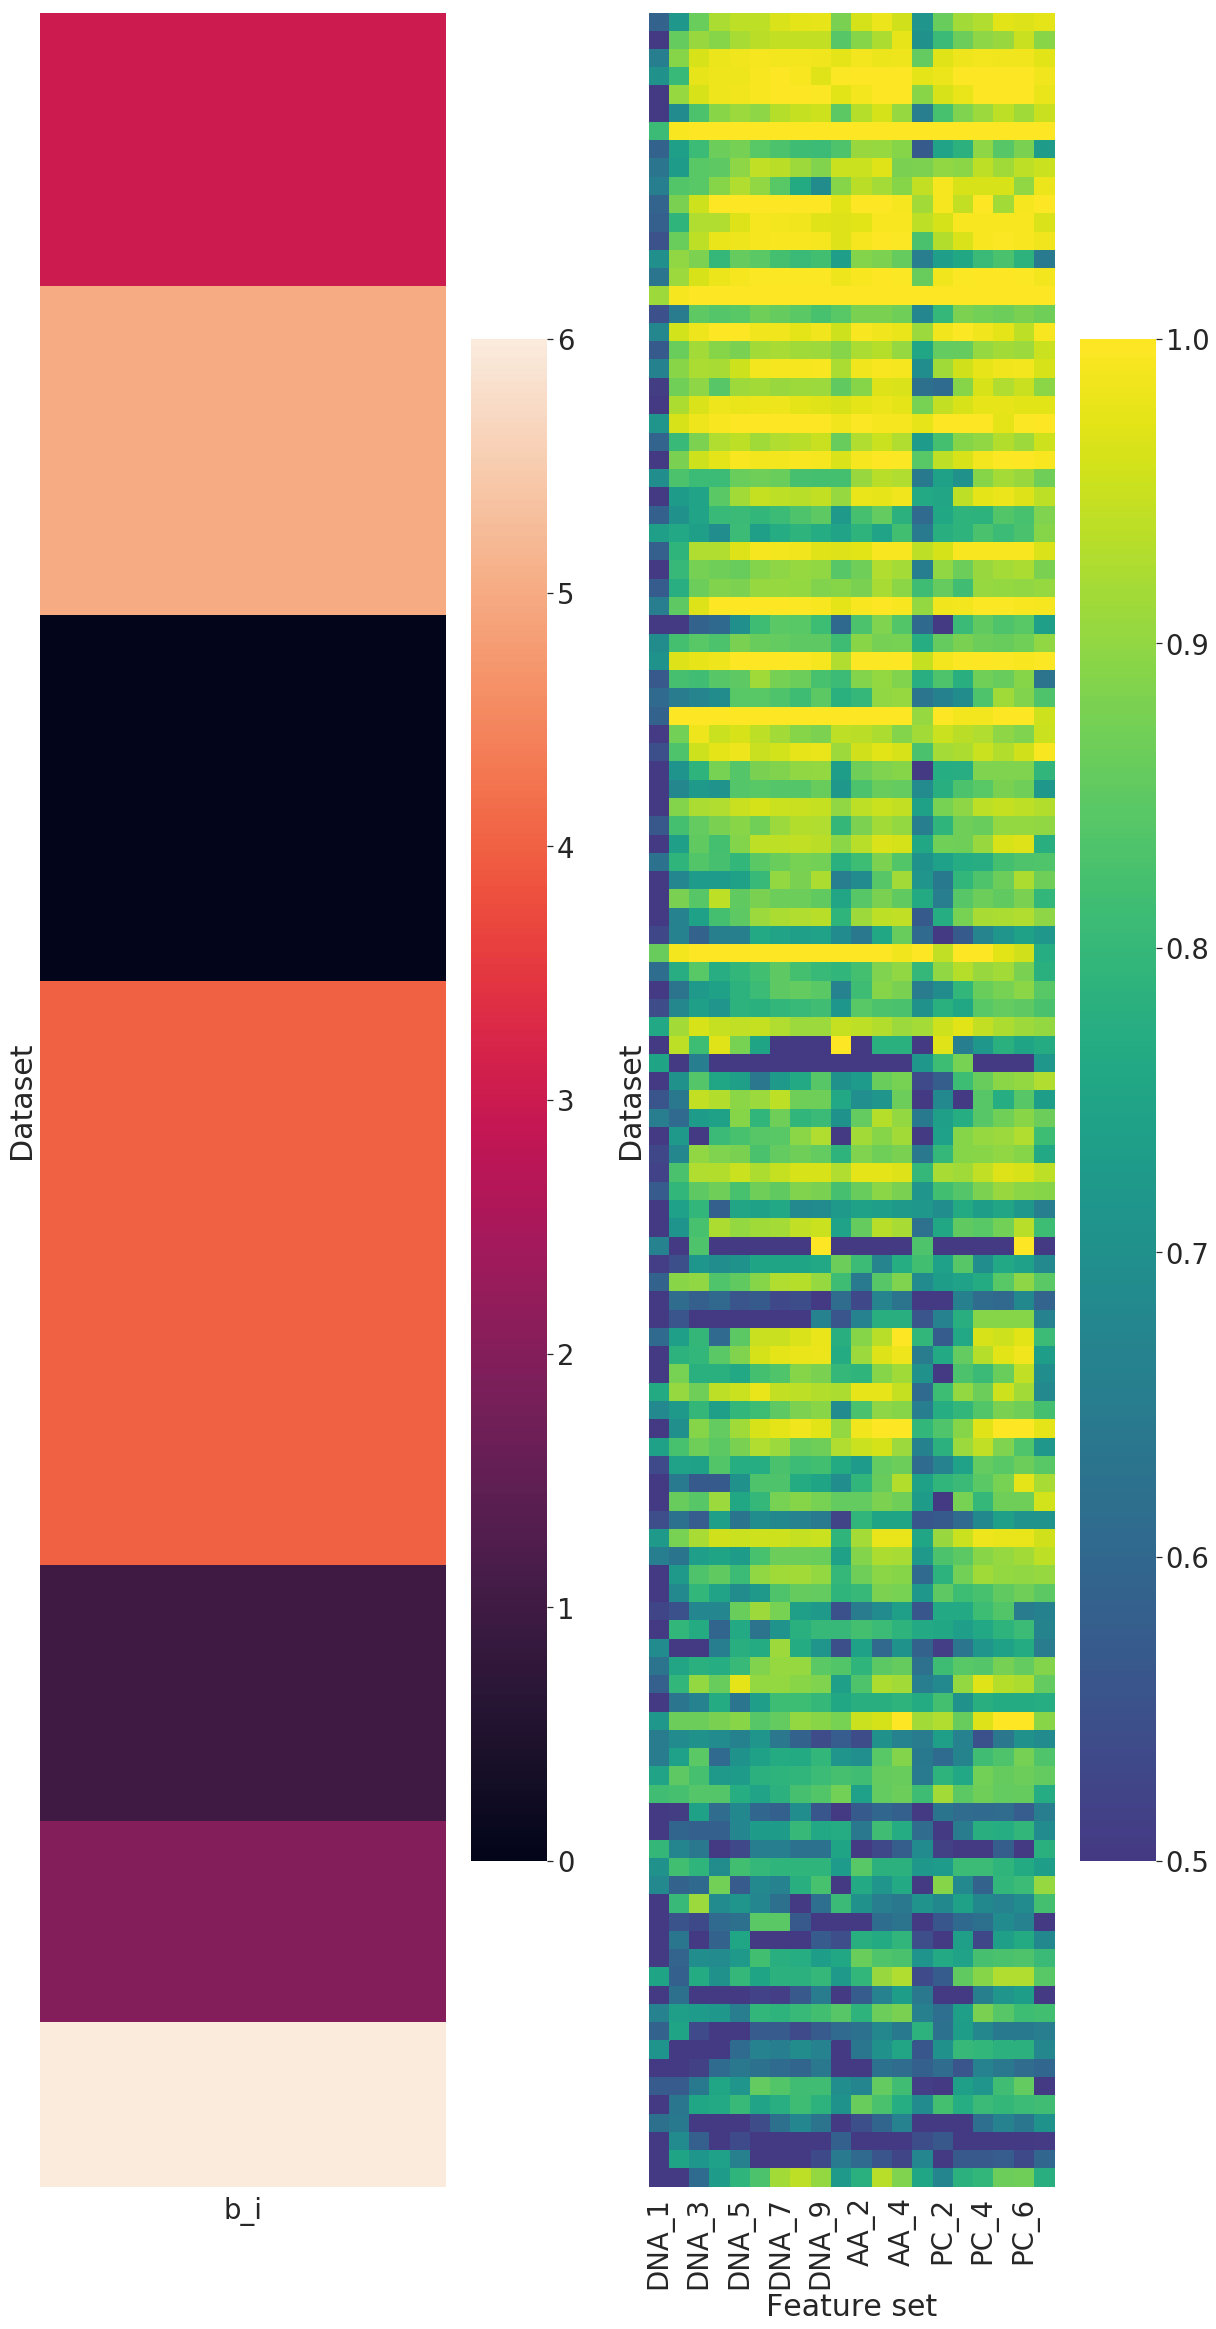

In [178]:
# Draw a heatmap with the numeric values in each cell
sns.set(font_scale=2.5)
f, ax = plt.subplots(1,2,figsize=(20, 40))
ax[0].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
ax[1].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
# ax[0].set_ylabel(ax.get_ylabel(), fontsize=25)
# ax[0].set_xlabel(ax.get_xlabel(), fontsize=25)
sns.heatmap(bdf, ax=ax[0])
sns.heatmap(df2,cmap = 'viridis',center =0.7, vmin = 0.5,   ax=ax[1])
f.savefig('Figures/heatmap_Bact_wo_ds.svg', bbox_inches="tight")

Text(998.972,0.5,'')

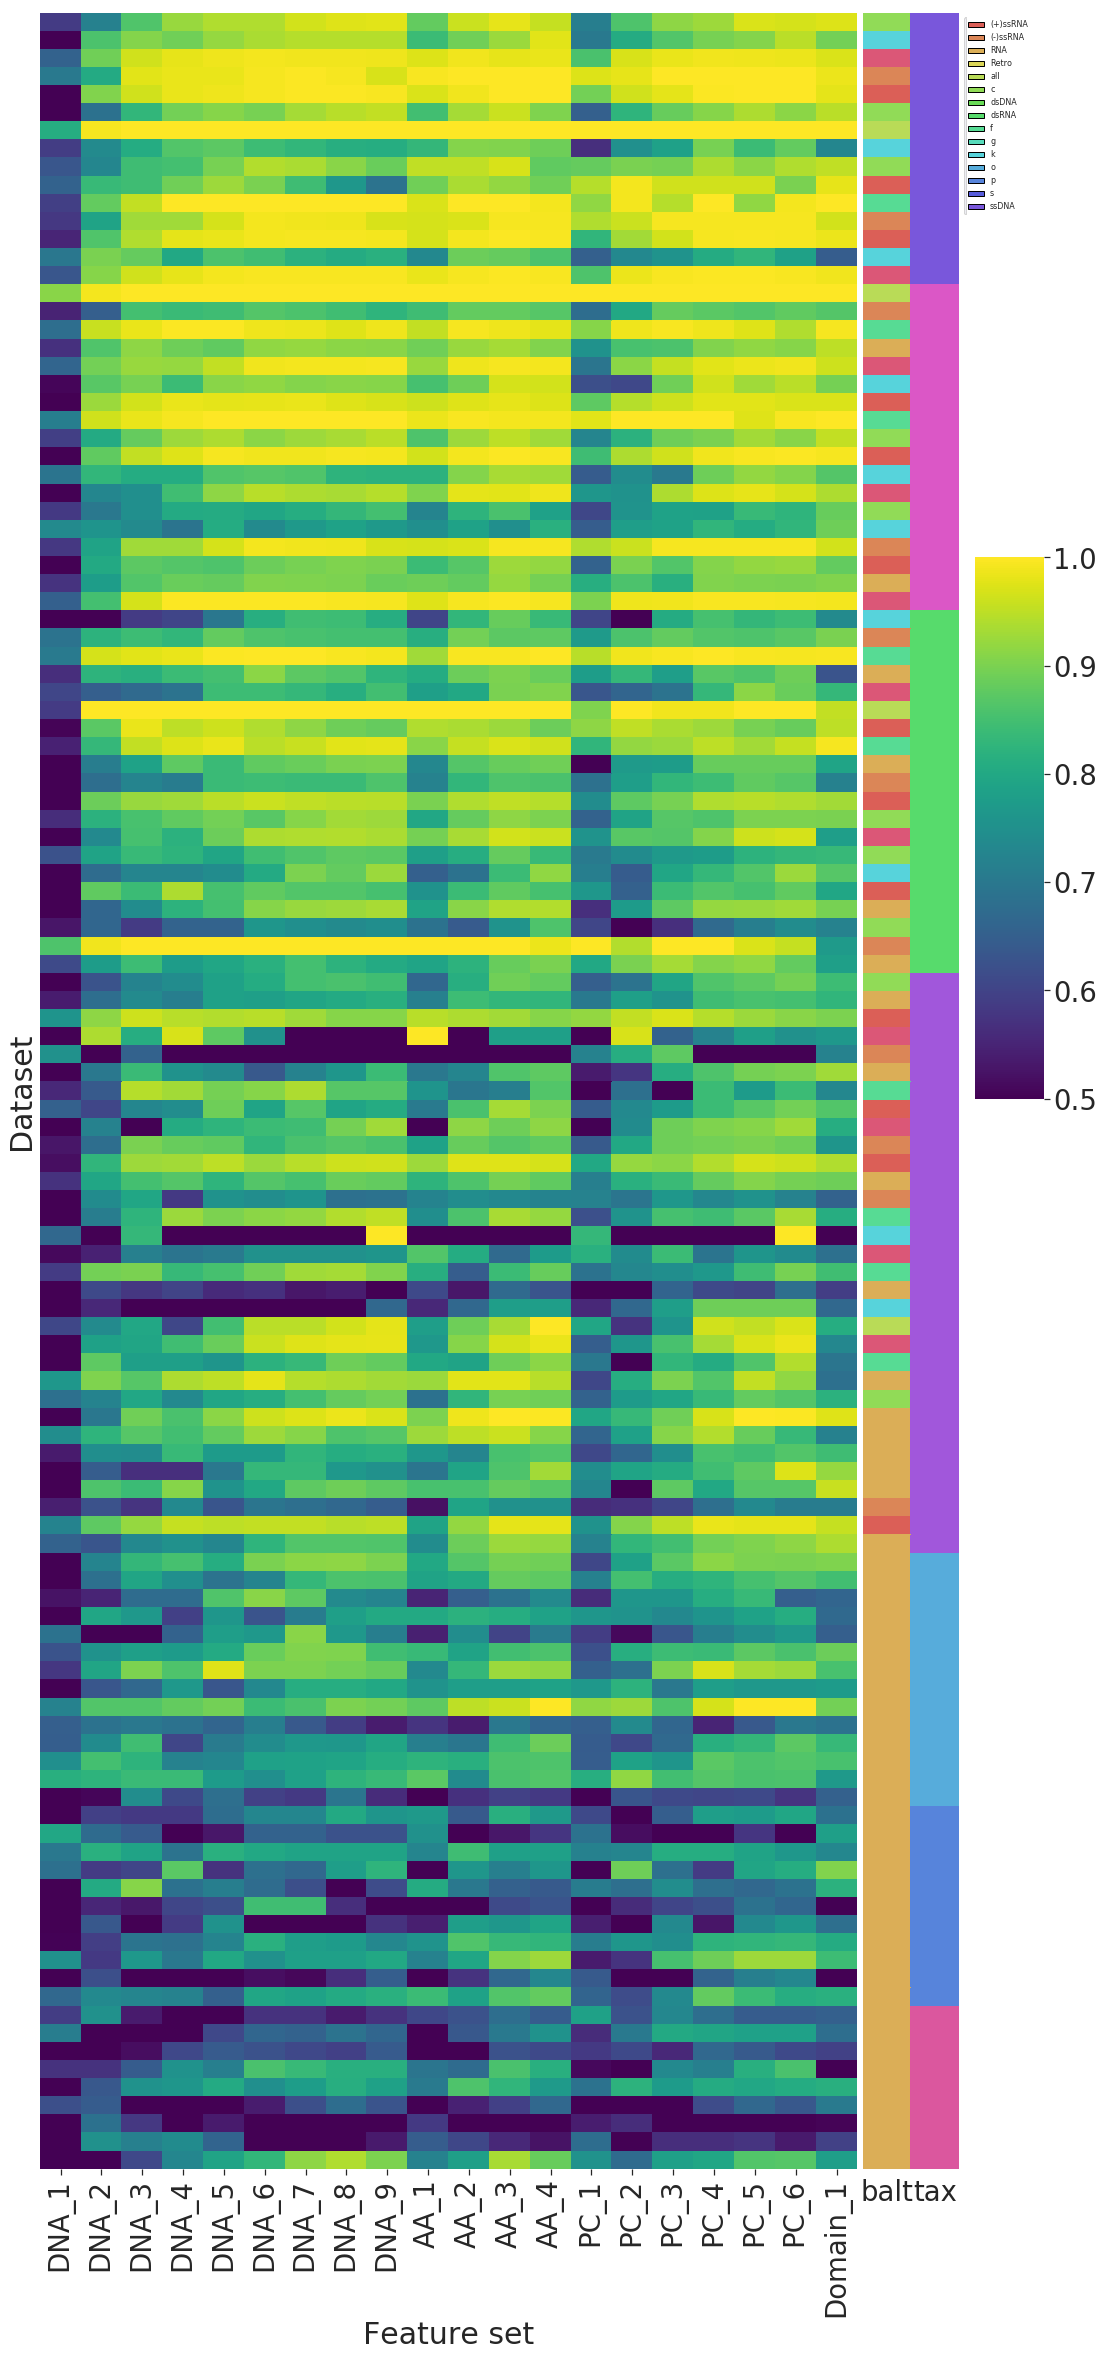

In [296]:
fig = plt.figure(figsize=(20,40))
ax1 = plt.subplot2grid((120,30), (0,0), colspan=22, rowspan=119)
ax2 = plt.subplot2grid((120,30), (0,22), colspan=3, rowspan=119)
#ax3 = plt.subplot2grid((120,30), (0,2), colspan=2, rowspan=119)
#ax5 = plt.subplot2grid((120,30), (10,27), colspan=2, rowspan=30)
ax6 = plt.subplot2grid((120,30), (30,25), colspan=2, rowspan=30)




sns.heatmap(df2, ax=ax1,vmin = 0.5,cbar = True, cbar_ax = ax6,  cmap="viridis")
ax1.xaxis.tick_bottom()
ax1.set_xticklabels(df2.columns,rotation=90)
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
pal= sns.color_palette('hls',20)
#ax2.set_ylabel(False)
c = catheat.heatmap( dfbalt[['balt','tax']],palette=pal,ax = ax2)
c.yaxis.set_label_text('')
# sns.heatmap(bdf, ax=ax2,   cmap="YlGnBu", cbar=True, cbar_ax = ax4, xticklabels=False, yticklabels=False)
# sns.heatmap(tdf, ax=ax3, cmap = 'plasma',   cbar=True,cbar_ax = ax5, xticklabels=False, yticklabels=False)

In [299]:
fig.savefig('Figures/hm_no_labs.png', bbox_inches="tight", dpi=300)

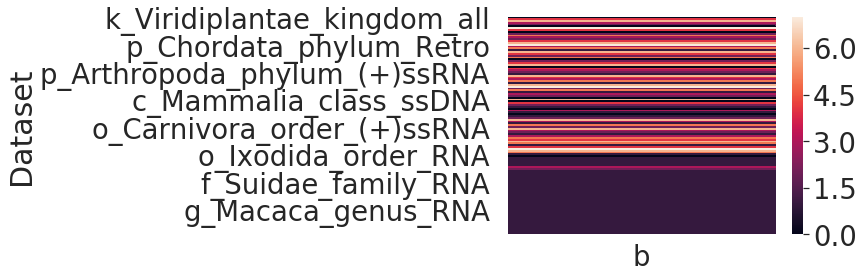

In [207]:
#fig, ax =plt.subplots(1,2)

#sns.heatmap(uniform_data, ax=ax[0])
sns.heatmap(bdfbalt['b'])

#plt.show(df1[df2['Dataset']]['Baltimore'])

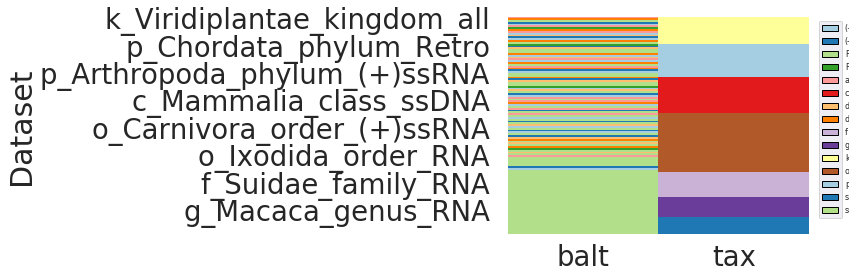

In [254]:
import catheat
catheat.heatmap( dfbalt[['balt','tax']],
                      palette='Paired' )


In [201]:
dfbalt=  pd.DataFrame (index =df2.index)
dfbalt['ds'] = dfbalt.index
taxfn = lambda row: (row['ds'][0])
dfbalt['tax'] = dfbalt.apply (taxfn, axis =1)
bf = lambda row: tax_order.index(row['tax'])
dfbalt['t'] = dfbalt.apply (bf, axis =1)
baltfn = lambda row: (row['ds'].split('_')[-1].strip())
dfbalt['balt'] = dfbalt.apply (baltfn, axis =1)
bf = lambda row: balt_order.index(row['balt'])
dfbalt['b'] = dfbalt.apply (bf, axis =1)


In [209]:
bdf =pd.DataFrame( dfbalt['b'])
tdf =pd.DataFrame( dfbalt['t'])
dfbalt.head()

,ds,tax,t,balt,b
Dataset,,,,,
k_Viridiplantae_kingdom_all,k_Viridiplantae_kingdom_all,k,0,all,0
k_Metazoa_kingdom_dsRNA,k_Metazoa_kingdom_dsRNA,k,0,dsRNA,4
k_Metazoa_kingdom_ssDNA,k_Metazoa_kingdom_ssDNA,k,0,ssDNA,6
k_Metazoa_kingdom_(-)ssRNA,k_Metazoa_kingdom_(-)ssRNA,k,0,(-)ssRNA,3
k_Metazoa_kingdom_(+)ssRNA,k_Metazoa_kingdom_(+)ssRNA,k,0,(+)ssRNA,2


In [221]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, k_Viridiplantae_kingdom_all  to s_Sus scrofa_species_RNA 
Data columns (total 1 columns):
t    119 non-null int64
dtypes: int64(1)
memory usage: 6.9+ KB


In [170]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, k_Viridiplantae_kingdom_all  to s_Sus scrofa_species_RNA 
Data columns (total 1 columns):
b_i    119 non-null int64
dtypes: int64(1)
memory usage: 6.9+ KB


In [147]:
blist = ['c', 'f', 'g', 'k', 'o', 'p', 's']

### Sort the dataset order

In [117]:
# concat_ds = lambda row: f'{row["tax"][0]} {row["label"]}'
# dfe['Dataset']= dfB.apply(concat_ds , axis=1)

df1 = dfe.sort_values('tax')
unique =[]
[unique.append(ds) for ds in(list(df1['Dataset']))if ds not in unique ]

dfp = df1.pivot_table(index='Dataset',columns='Feature set', values ='AUC')
df2 = dfp.reindex(unique)

In [118]:
df2.head()

Feature set,DNA_1,DNA_2,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,AA_1,AA_2,AA_3,AA_4,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Domains_0
Dataset,,,,,,,,,,,,,,,,,,,,
Metazoa_kingdom_dsDNA,0.650,0.802,0.978,0.999,1.000,1.000,1.000,1.000,1.000,0.986,1.000,0.999,0.981,0.986,0.981,0.979,0.989,0.978,0.994,1.000
Viridiplantae_kingdom_dsRNA,0.787,0.871,0.951,0.924,0.947,0.920,0.889,0.862,0.844,0.804,0.911,0.893,0.924,0.698,0.720,0.911,0.891,0.916,0.898,0.758
Viridiplantae_kingdom_(+)ssRNA,0.490,0.818,0.972,0.970,0.977,0.994,0.984,0.974,0.970,0.888,0.948,0.982,0.994,0.764,0.846,0.913,0.918,0.950,0.960,0.959
Viridiplantae_kingdom_ssDNA,0.889,0.957,0.982,0.987,0.981,0.982,0.982,0.986,0.992,0.988,0.998,0.998,0.999,0.927,0.985,0.989,0.994,0.997,0.994,0.998
Viridiplantae_kingdom_(-)ssRNA,0.612,0.929,1.000,0.980,1.000,1.000,1.000,0.918,0.827,1.000,1.000,0.976,1.000,1.000,1.000,1.000,0.988,1.000,0.988,1.000


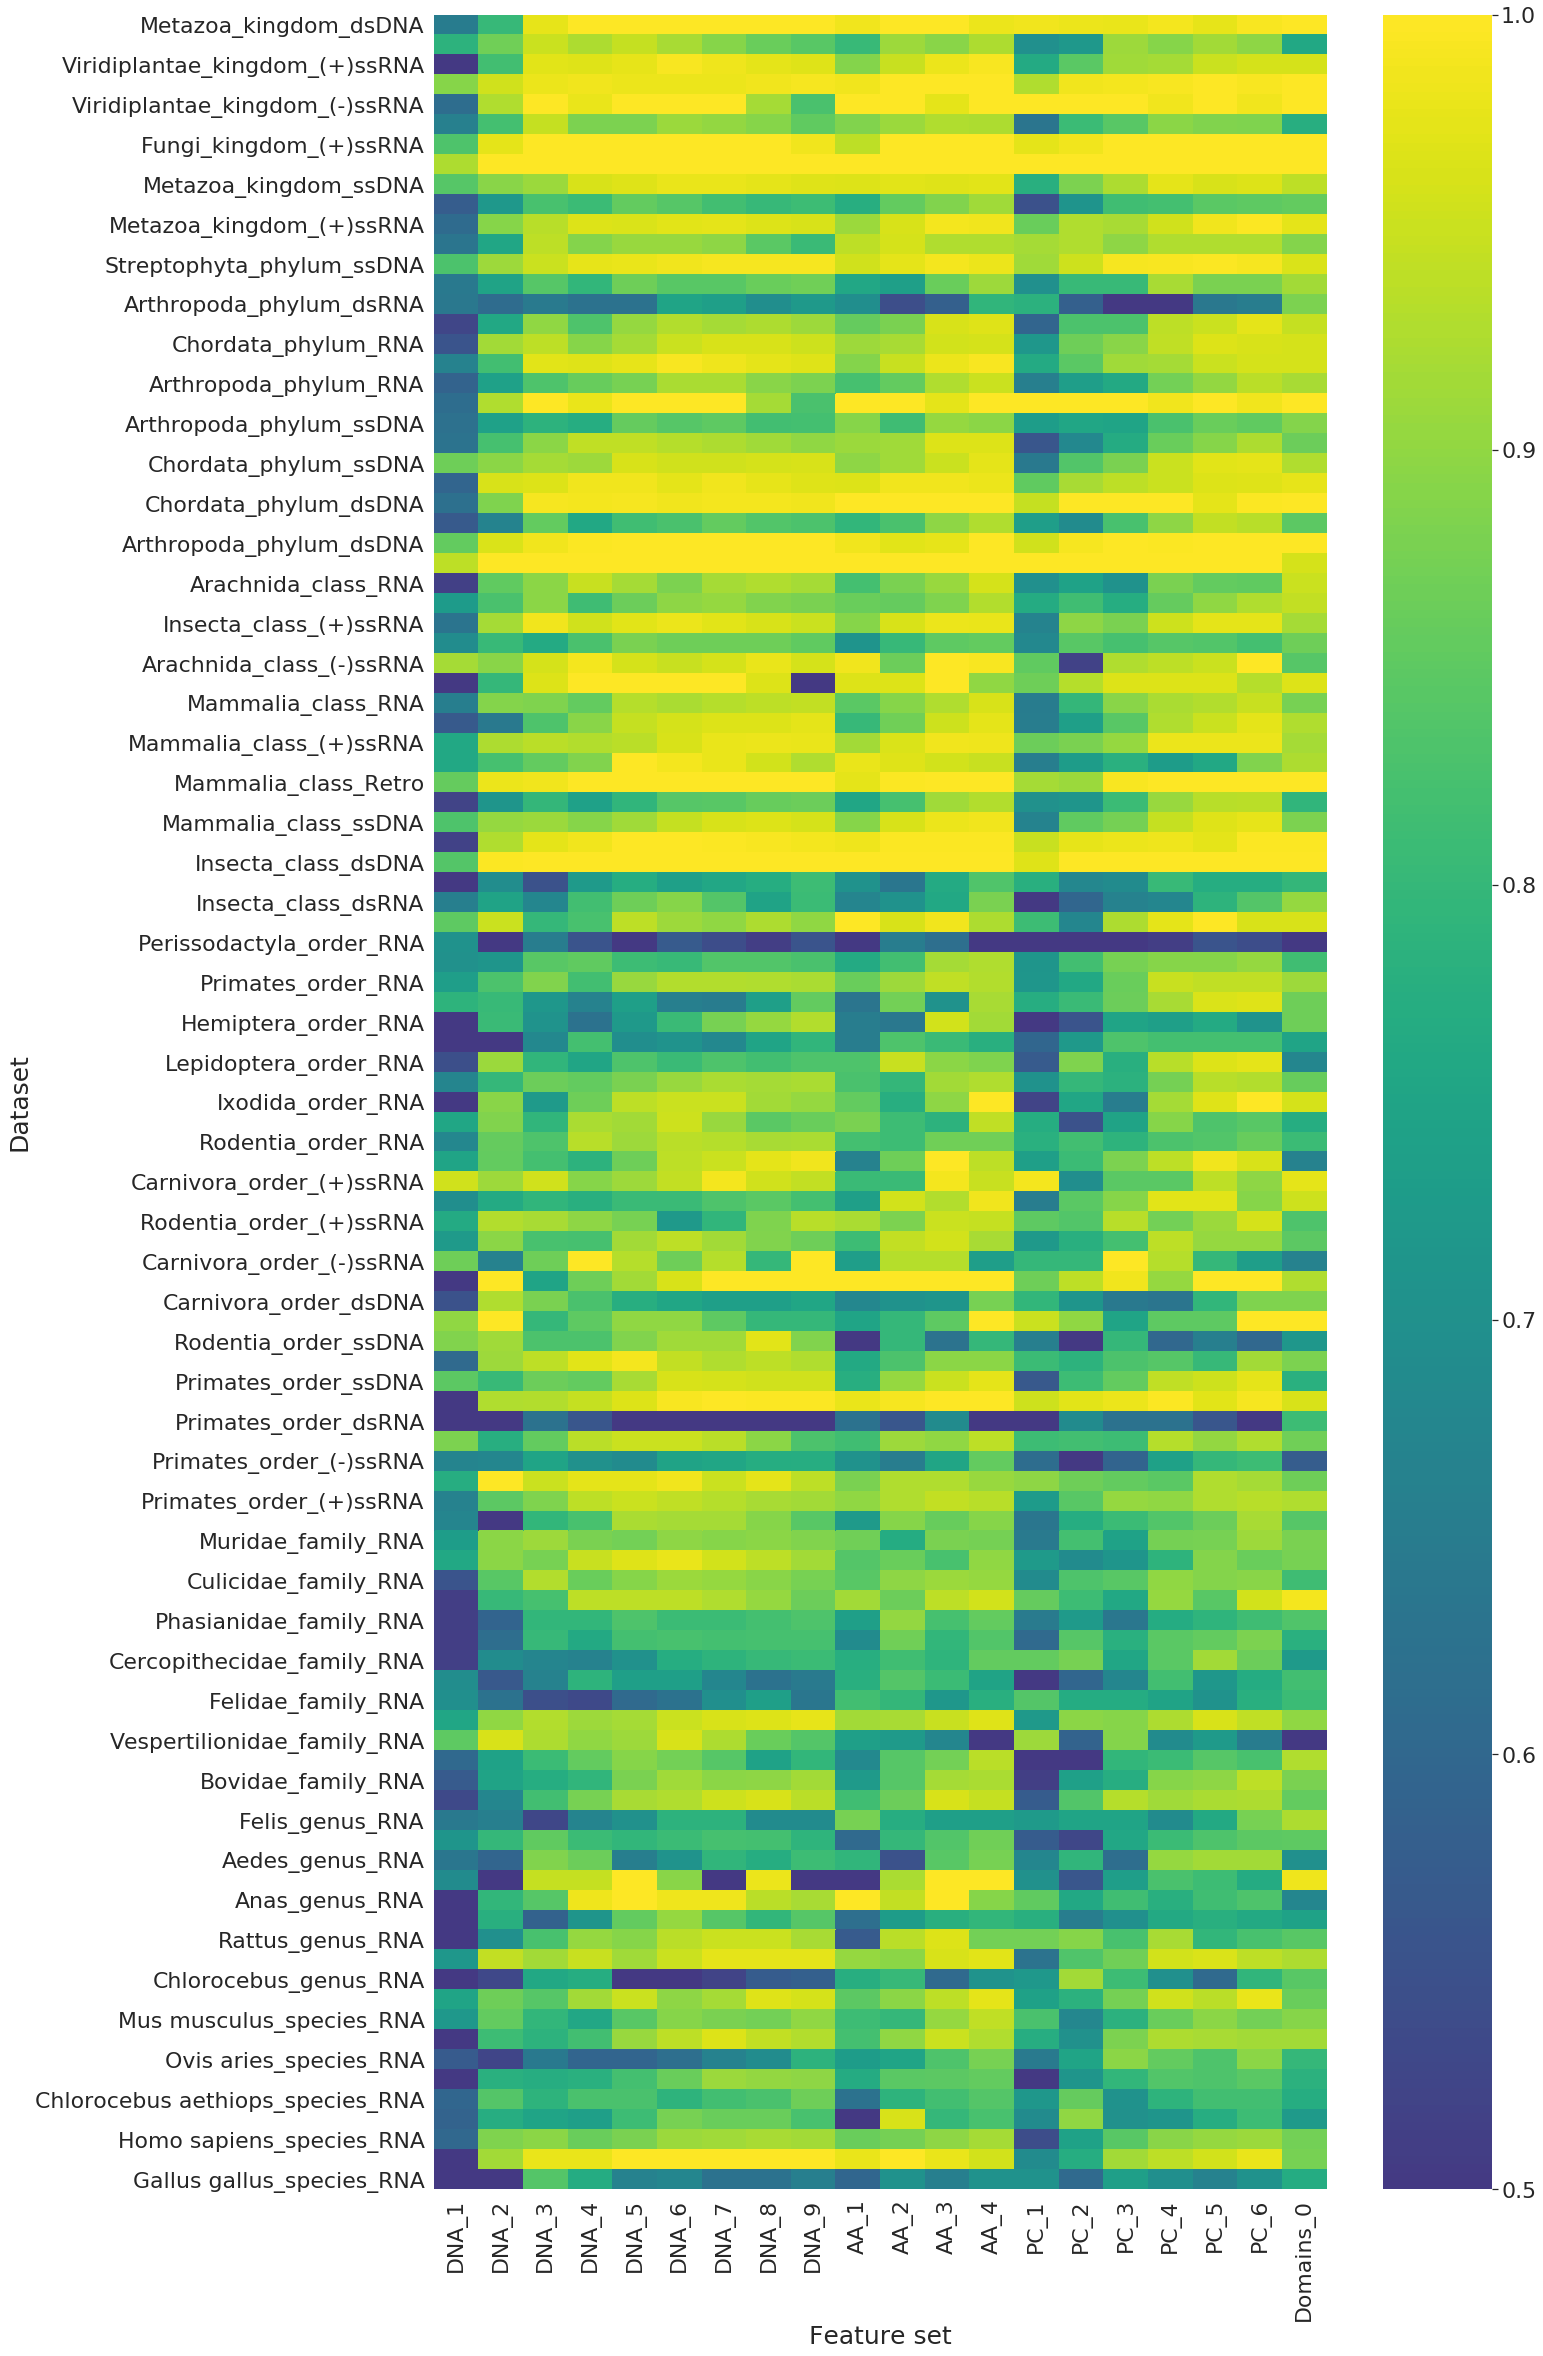

In [120]:
sns.set(font_scale=2.0)
f, ax = plt.subplots(figsize=(20, 40))
# ax.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     right=False,      # ticks along the bottom edge are off
#      left=False,         # ticks along the top edge are off
#     labelleft=False
#     )
ax.set_ylabel(ax.get_ylabel(), fontsize=25)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)

sns.heatmap(df2,cmap = 'viridis',center =0.7, vmin = 0.5,   ax=ax)
f.savefig('../figures/heatmap_Euk_labeled.png', bbox_inches="tight")